# Проект на тему: Основы машинного обучения

# Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 
Моя задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
  проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-базовые-рекомендации" data-toc-modified-id="Выводы-и-базовые-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и базовые рекомендации</a></span></li></ul></div>

## Загрузка данных

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import scipy.stats as stats
import seaborn as sns
import warnings
import plotly.express as px
import datetime as dt
from plotly import graph_objects as go 
import math as mth
from scipy import stats as st
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from IPython.display import display
from sklearn.metrics import roc_auc_score
from matplotlib.pylab import rc, plot
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
display(df)
df.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Имеем следующие "проблемы":
- заглавные буквы и отсутствие змеиного регистра в названиях столбцов

## Предобработка данных

In [3]:
#функция для вывода данных
def data(dataframes):
    dataframes.columns = [x.lower().replace(' ', '_') for x in dataframes.columns.values]
    for column in dataframes.columns:
        print('====================')
        print(column)
        print(dataframes[column].value_counts())
        print(dataframes[column].unique())
    print(dataframes.info())
    display(dataframes.head())

In [4]:
data(df)

gender
1    2041
0    1959
Name: gender, dtype: int64
[1 0]
near_location
1    3381
0     619
Name: near_location, dtype: int64
[1 0]
partner
0    2053
1    1947
Name: partner, dtype: int64
[1 0]
promo_friends
0    2766
1    1234
Name: promo_friends, dtype: int64
[1 0]
phone
1    3614
0     386
Name: phone, dtype: int64
[0 1]
contract_period
1     2207
12     960
6      833
Name: contract_period, dtype: int64
[ 6 12  1]
group_visits
0    2351
1    1649
Name: group_visits, dtype: int64
[1 0]
age
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
18      2
19      2
41      1
Name: age, dtype: int64
[29 31 28 33 26 34 32 30 23 27 35 25 36 24 21 37 22 19 20 38 39 18 41]
avg_additional_charges_total
89.952762     1
174.658455    1
122.765563    1
204.444527    1
50.813166     1
             ..
272.997181    1
115.130268    1
133.525137    1
20

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
# смотрим наличие явных дубликатов
df.duplicated().sum()

0

In [6]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- Мужчин и женщин одинаковое количество;
- В одном районе с фитнесом проживает 85% людей;
- 49 % клиентов сотрудники компаний-партнеров
- 31 % приходят по рекомендации друзей
- 90 % пользователей оставляют телефон
- в основном абонемент покупают на 6 месяцев
- 41% посещают груповые занятия
- средний возраст клиентов 29 лет.
- средняя доп покупка = 146 у.е.
- среднее количество месяцев посещения 3.7
- средний отток составляет 27 %

In [7]:
df_churn=df.groupby('churn').mean()

In [8]:
df_churn_tr = df_churn.transpose()
df_churn_tr

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Люди которые остаются как правило:
- живут в одном районе с фитнесом
- из компании-партнера
- по рекомендации друга
- 5.7 месяца в клубе
- ходит на групповые занятия
- возраст остающихся на три года выше среднего возраста уходящих
- больше тратят на услуги
- до конца абонемента 5.2 месяца
- уже занимаются в среднем 4.7 месяца
- посещает фитнес в среднем 2 раза в неделю

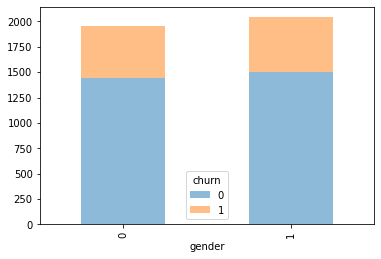

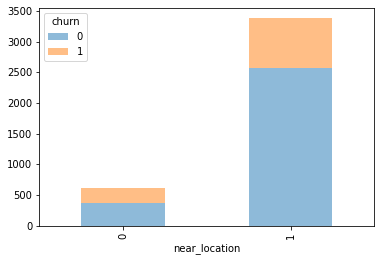

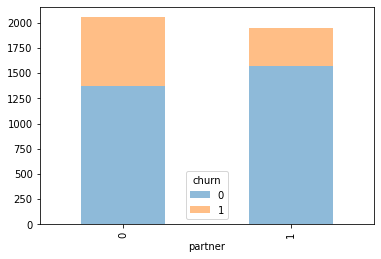

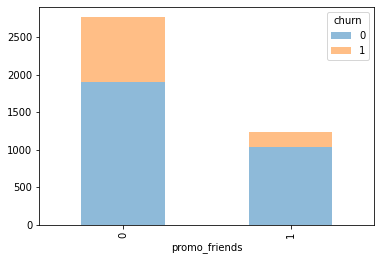

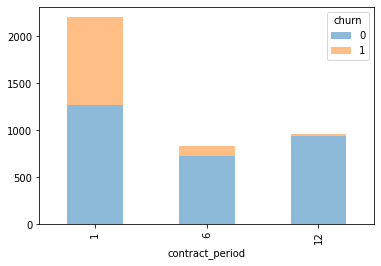

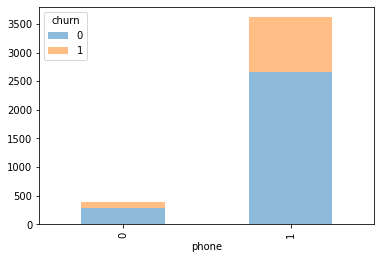

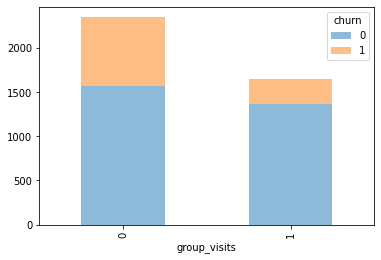

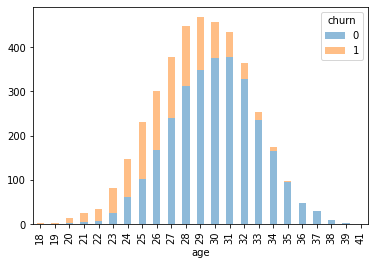

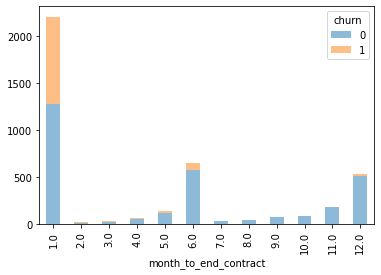

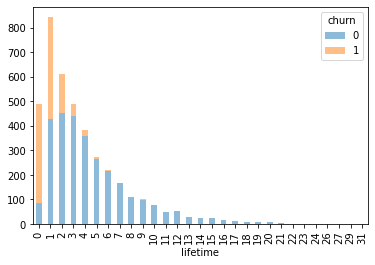

In [9]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'phone', 'group_visits', 'age', 'month_to_end_contract', 'lifetime',]:
    if column == 'partner':
        report = df.pivot_table(index = column, columns = 'churn', values = 'phone', aggfunc = 'count')
        report.plot(kind = 'bar', stacked = True, alpha = 0.5)
    else:
        report = df.pivot_table(index = column, columns = 'churn', values = 'partner', aggfunc = 'count')
        report.plot(kind = 'bar', stacked = True, alpha = 0.5)

Отток происходит в основном в первые 4 месяца, у людей с 1-месячным контрактом. Группа людей старше 33 лет наиболее удерживаема.

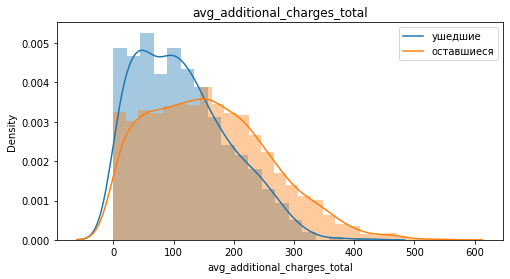

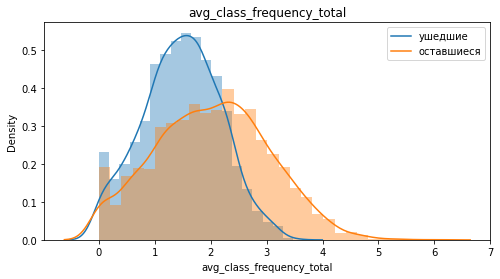

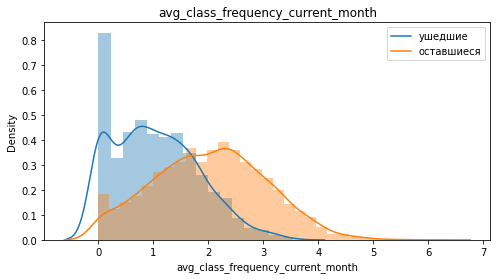

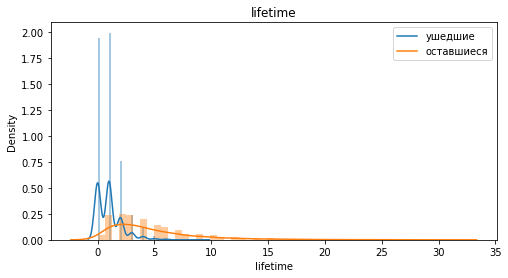

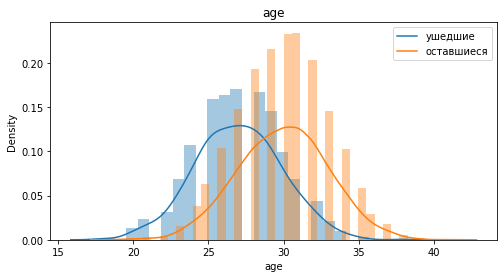

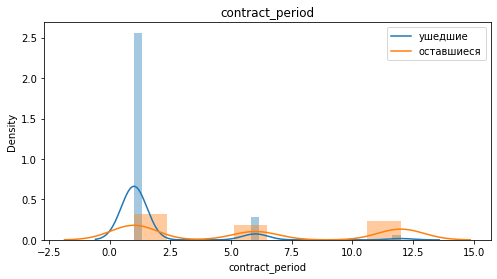

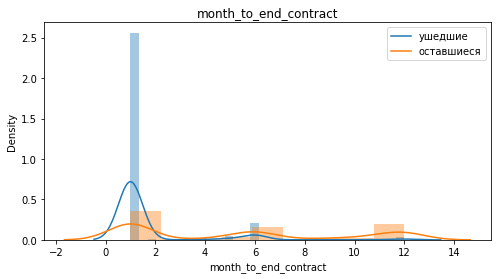

In [10]:
first = df[df['churn'] == 1]
zero = df[df['churn'] == 0]
distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'lifetime', 'age', 'contract_period', 'month_to_end_contract']
for column in distplot_columns: 
    plt.figure(figsize=(8,4)) 
    plt.title(column)
    sns.distplot(first[column])
    sns.distplot(zero[column])
    plt.legend(['ушедшие', 'оставшиеся'])
    plt.show()

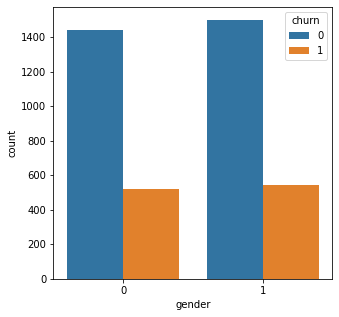

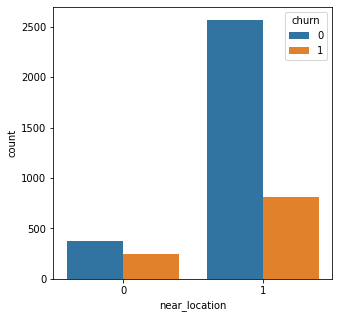

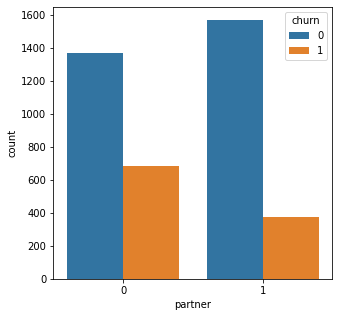

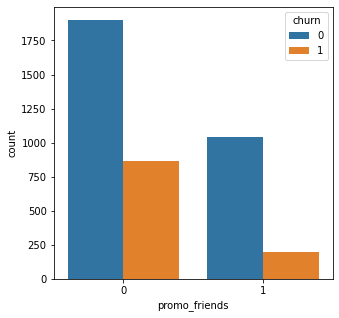

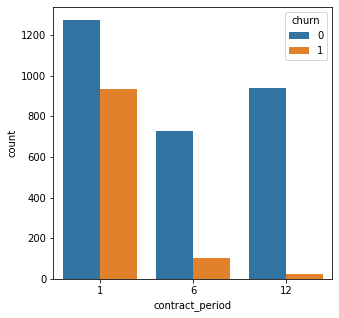

In [11]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.show()

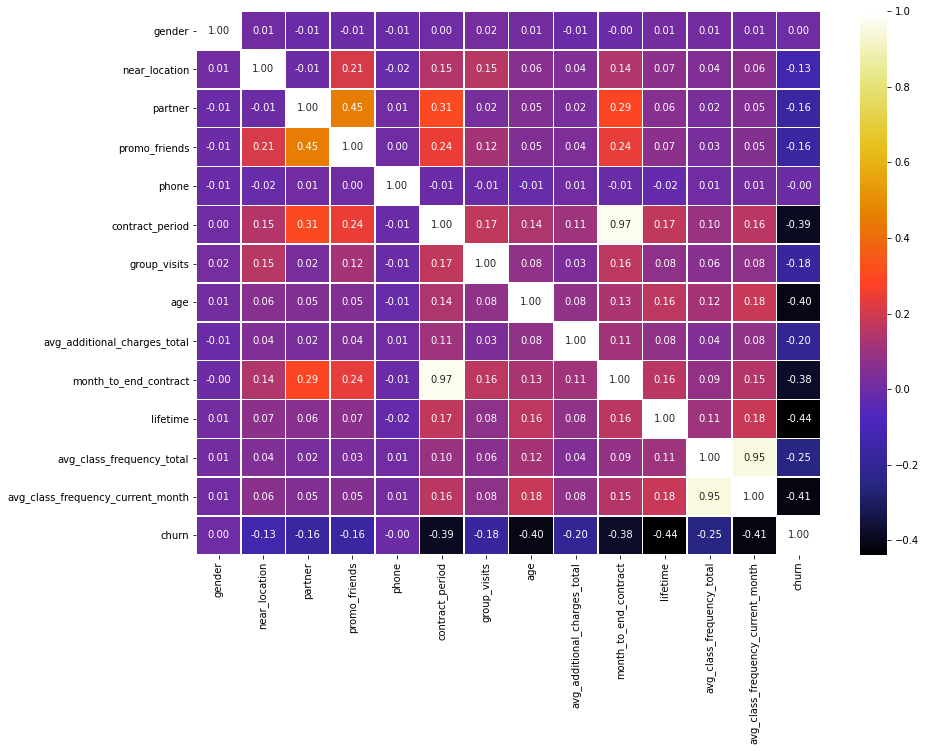

In [12]:
corr = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot = True, fmt = '0.2f', linewidths=.5, cmap="CMRmap")
plt.show()

Видна положительная корреляция между рекомендациями друзей, парнтерскими занятиями, месяцев до конца абонемента и близостью фитнеса. То есть увеличение одного показателя влечет увеличение других. Уровень оттока снижается при условии "долгого" контракта, старшего возраста, частых посещений, длительности посещений (лайфтайама).

## Модель прогнозирования оттока клиентов

In [13]:
X = df.drop(columns = ['churn', 'month_to_end_contract'], axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [15]:
def prin(y, pred, prob):
    print('Accuracy: {:.2f}'.format(accuracy_score(y, pred)))
    print('Precision: {:.2f}'.format(precision_score(y, pred)))
    print('Recall: {:.2f}'.format(recall_score(y, pred)))
    print('F1: {:.2f}'.format(f1_score(y, pred)))
    print('ROC_AUC: {:.2f}'.format(roc_auc_score(y, prob)))

In [16]:
prin(y_test, predictions, probabilities)

Accuracy: 0.93
Precision: 0.90
Recall: 0.81
F1: 0.85
ROC_AUC: 0.97


In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [18]:
prin(y_test, rf_predictions, rf_probabilities)

Accuracy: 0.92
Precision: 0.87
Recall: 0.80
F1: 0.84
ROC_AUC: 0.97


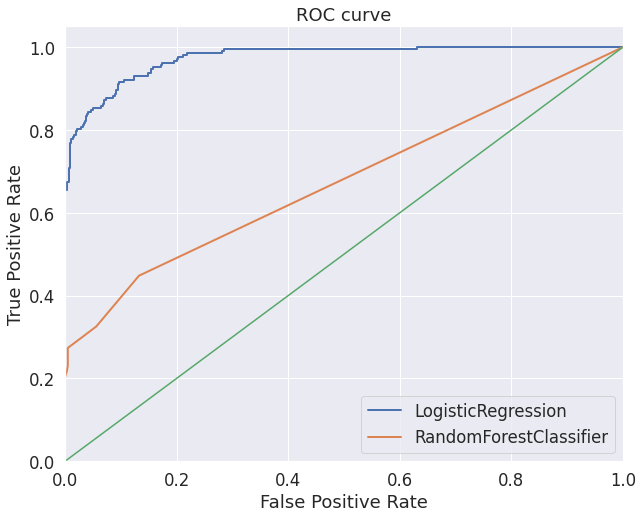

In [19]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
fpr_f, tpr_f, thresholds_f = metrics.roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label= 'LogisticRegression')
plt.plot(fpr_f, tpr_f, lw=lw, label= 'RandomForestClassifier')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.legend()
plt.show()

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

Метрики логистической регрессии лучше. Ну и метрика roc_auc явно говорит, что прогноз посредством логистической регрессии занчительно лучше.

## Кластеризация клиентов

In [20]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

In [21]:
linked = linkage(df_sс, method = 'ward')

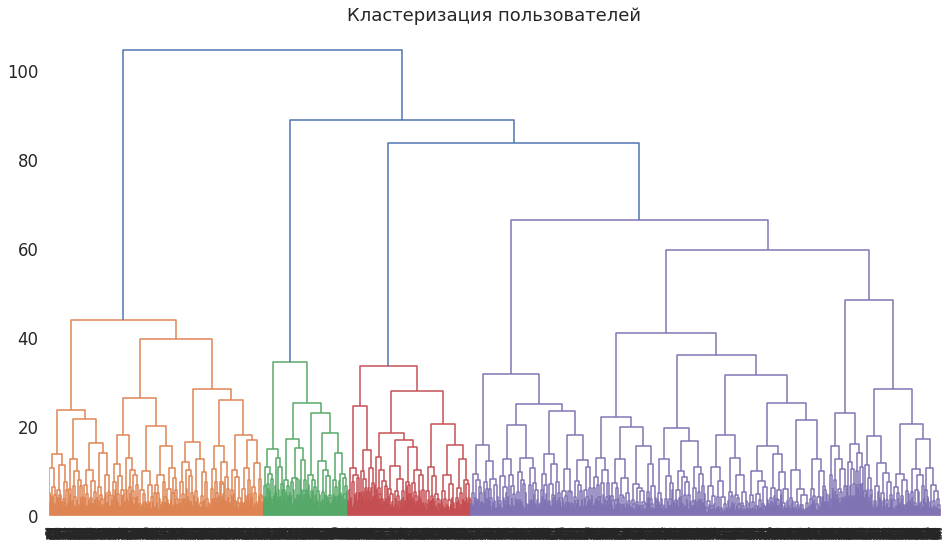

In [22]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

Выделено 4 кластера.

In [23]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

In [24]:
df.cluster.value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

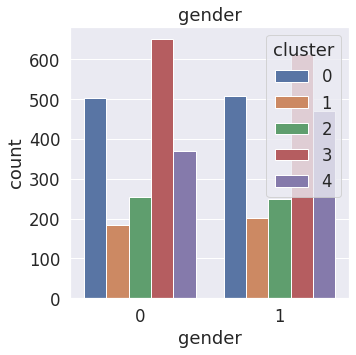

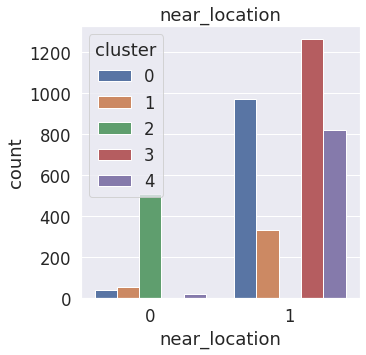

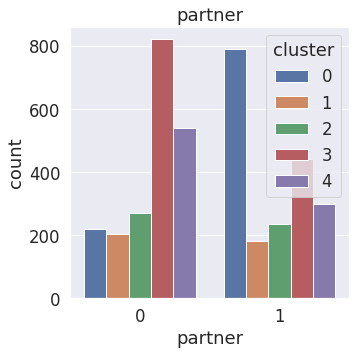

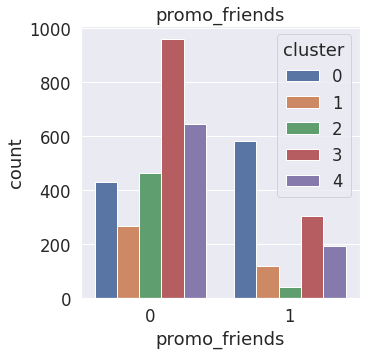

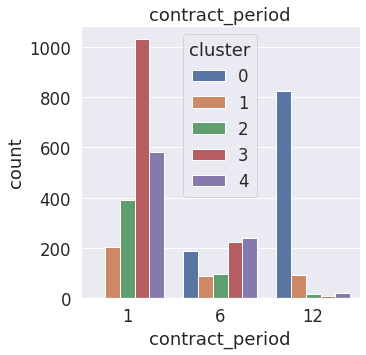

In [25]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

In [26]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Кластеры под номерами 2 и 3 наиболее склонны к оттоку
Пользователи 3 кластера живут около фитнеса, пользуются в среднем 2,5 месяца. Стоит обратить внимание на эту группу, выяснить причины оттока. Создается впечатление, что эта группа состоит из молодых людей пришедших самостоятельно и особо не представляющих целей занятия фитнесом. Возможно стоит их заинтересовать, составить план тренировок. 
Со второй группой сложнее поскольку живут не в районе фитнеса, в основном занимаются индивидуально и чтобы удержать этих пользователей нужно приложить усилия, которые вряд ли окупятся. Тем более их число не велико. 

Промежуточное положение занимает кластер под номером  1.
Их число самое маленькое, обращает на себя внимание, что пользователи этого кластера не оставляют номер телефона

Лучшие кластеры по номерами 0 и 4.
Это в основном жители района, сотрудники района, по скидке от друзей, с длительным абонементом и часто посещающие занятия.


## Выводы и базовые рекомендации

Отток происходит в основном в первые 4 месяца, у людей с 1-месячным контрактом. Группа людей старше 33 лет наиболее удерживаема. То есть необходимо обратить на новых клиентов моложе 33 лет, прежде всего из 3 кластера поскольку он многочислен, выяснить причины оттока и постараться удержать их, возможно занятиями с личным тренером, либо в групповых занятиях.